In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/emotion_audio (1).csv')

In [ ]:
data.shape

(12798, 69)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12798 entries, 0 to 12797
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   file_name                      12798 non-null  object 
 1   zero_crossing_rate             12798 non-null  float64
 2   energy                         12798 non-null  float64
 3   entropy_of_energy              12797 non-null  float64
 4   spectrogram                    12798 non-null  float64
 5   mel_spectrogram                12798 non-null  float64
 6   harmonics                      12798 non-null  float64
 7   perceptual_shock_wave          12798 non-null  float64
 8   spectral_centroids             12798 non-null  float64
 9   spectral_centroids_delta       12798 non-null  float64
 10  spectral_centroids_accelerate  12798 non-null  float64
 11  tempo_bpm                      12798 non-null  float64
 12  spectral_rolloff               12798 non-null 

In [ ]:
data.isnull().sum()

,0
file_name,0
zero_crossing_rate,0
energy,0
entropy_of_energy,1
spectrogram,0
...,...
chroma9,0
chroma10,0
chroma11,0
chroma12,0


In [ ]:
data_cleaned = data.dropna()

In [ ]:
df = data_cleaned.drop(columns=["file_name"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
emotion_encoder = LabelEncoder()
df['Emotion'] = emotion_encoder.fit_transform(df['Emotion'])
print(df.head())
print("Encoded Emotion Classes:", list(emotion_encoder.classes_))

   zero_crossing_rate    energy  entropy_of_energy  spectrogram  \
0            0.063600  0.015981           1.753098   -65.049736   
1            0.264940  0.003920           2.642264   -60.538280   
2            0.022468  0.000092           4.512234   -21.174078   
3            0.115942  0.001259           3.097907   -55.599422   
4            0.085622  0.003050           2.715197   -35.683098   

   mel_spectrogram  harmonics  perceptual_shock_wave  spectral_centroids  \
0        -80.00000  -0.000008           4.075109e-05         1438.755337   
1        -80.00000  -0.000027          -1.117115e-05         3823.802785   
2        -66.27150   0.001440           1.446727e-05          973.752806   
3        -78.47669  -0.000006           2.844457e-07         2425.663230   
4        -72.01310   0.000021          -8.252713e-06         1929.787864   

   spectral_centroids_delta  spectral_centroids_accelerate  ...   chroma4  \
0                  1.853078                       1.336989  ...

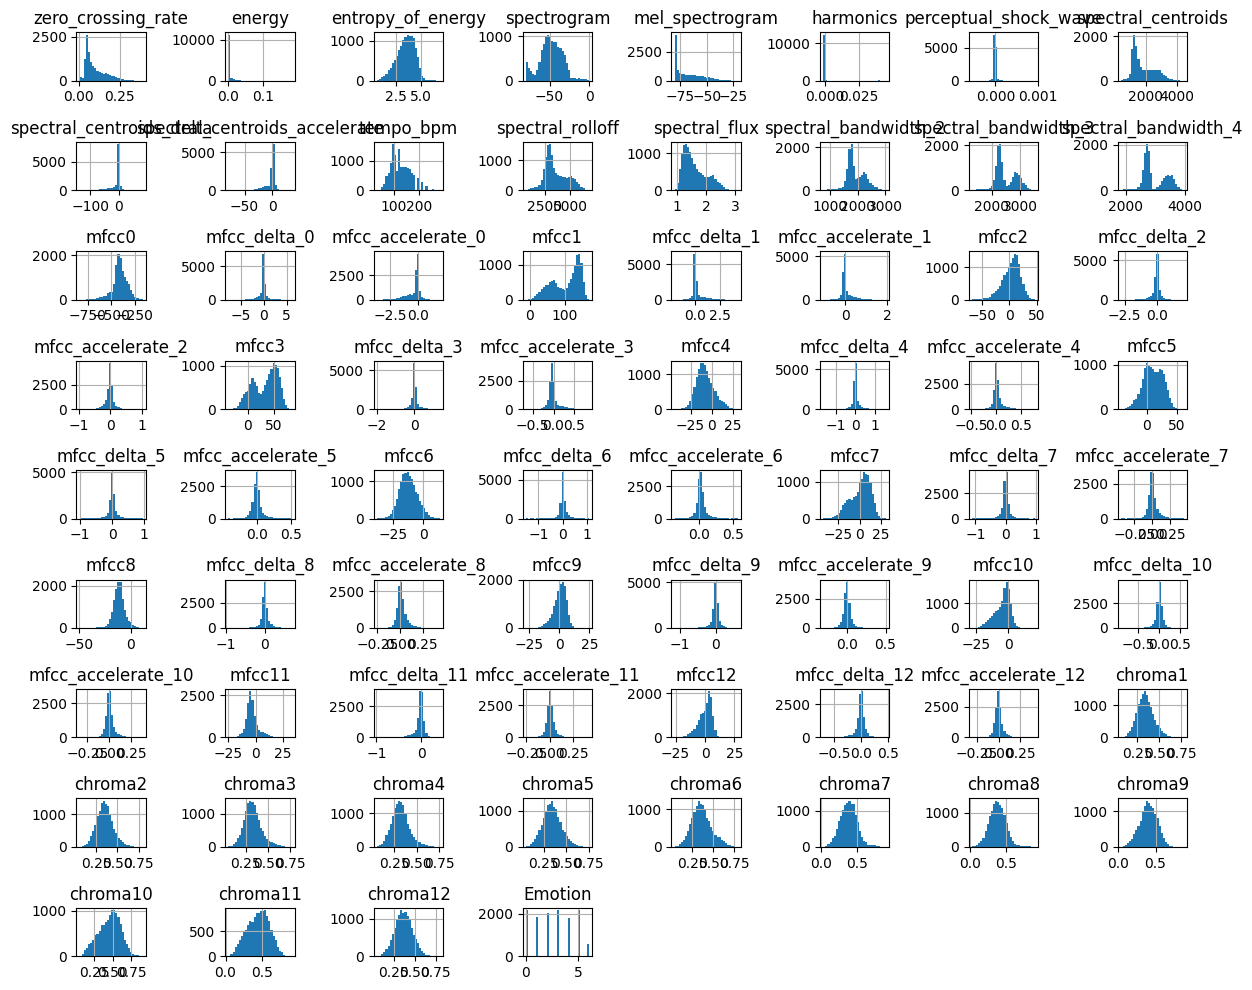

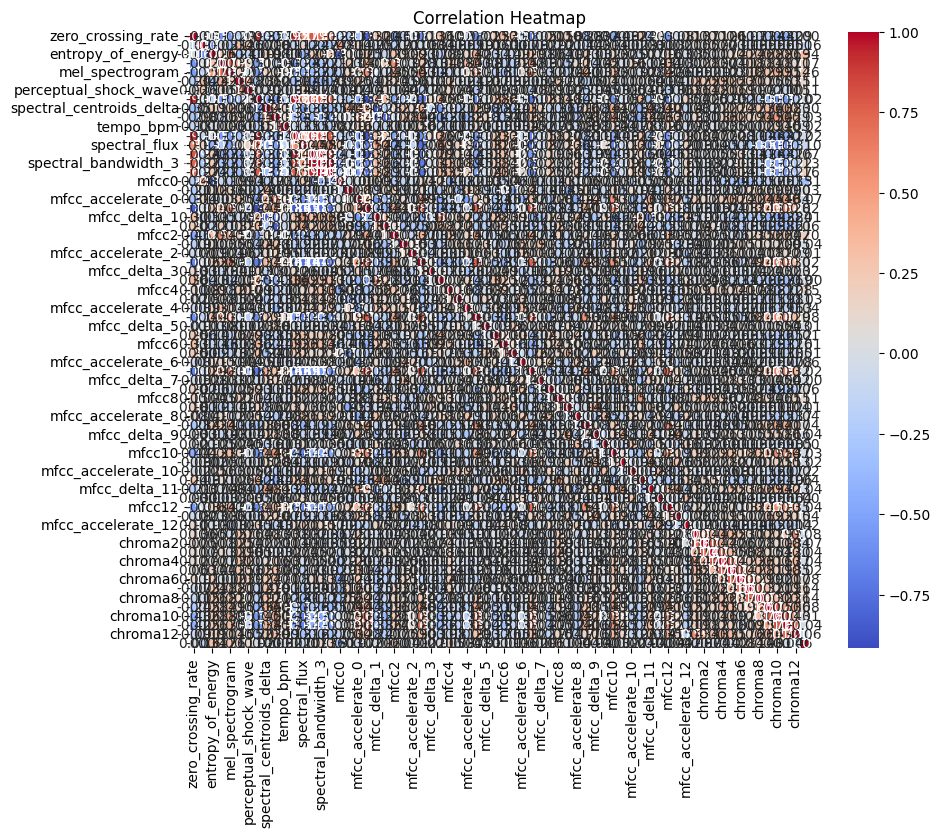

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Plot correlation heatmap to check relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
threshold = 0.05
correlation = df.corr(numeric_only=True)
emotion_corr = correlation['Emotion'].drop('Emotion').sort_values(ascending=False)
# Keep features with higher absolute correlation with emotion
strong_features = emotion_corr[emotion_corr.abs() > threshold].index.tolist()

# Add 'emotion' back to keep it in the dataset
df_filtered = df[strong_features + ['Emotion']]

In [ ]:
corr_matrix = df_filtered.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df_cleaned = df_filtered.drop(columns=to_drop)

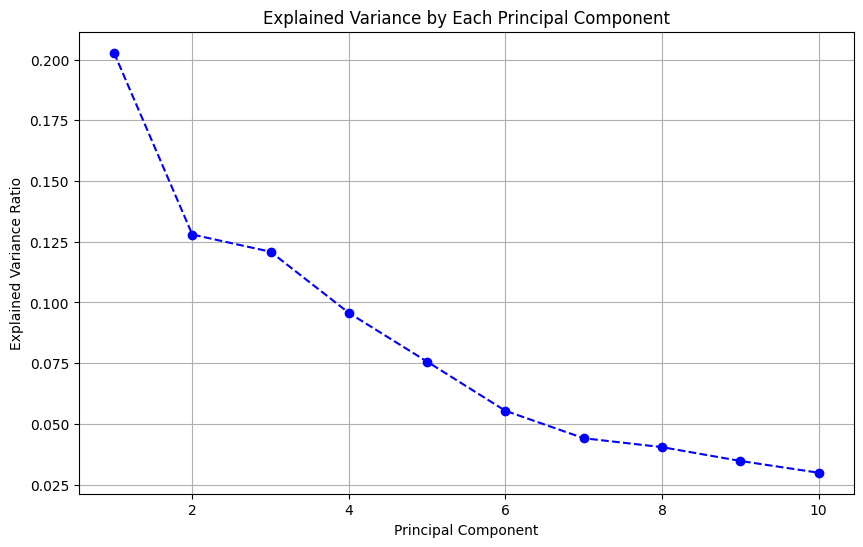

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardizing the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=['Emotion']))

# Apply PCA
pca = PCA(n_components=10)
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

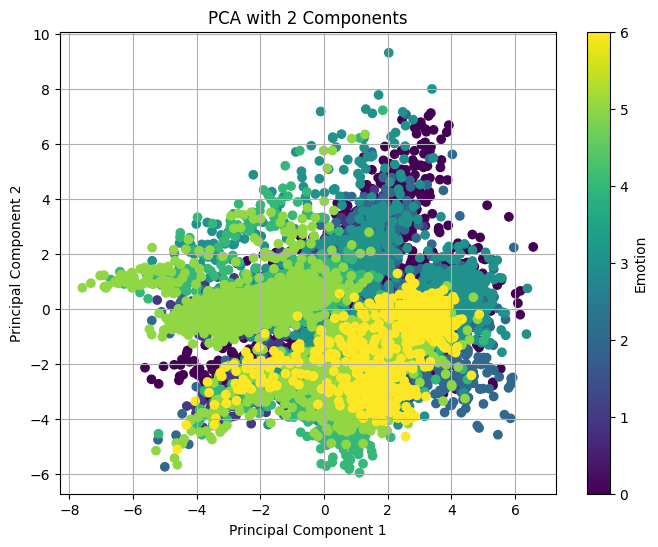

In [ ]:
# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)

# Plot the 2D PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_2_result[:, 0], pca_2_result[:, 1], c=df_cleaned['Emotion'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA with 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Emotion')
plt.grid(True)
plt.show()

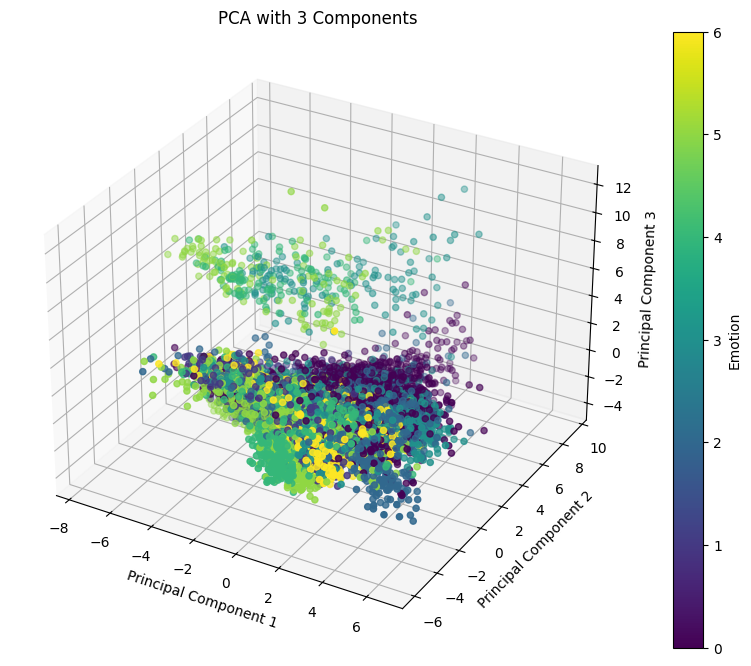

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df_scaled)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_3d = ax.scatter(pca_3_result[:, 0], pca_3_result[:, 1], pca_3_result[:, 2], c=df_cleaned['Emotion'].astype('category').cat.codes, cmap='viridis')
ax.set_title('PCA with 3 Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
# Adding colorbar with the scatter plot
fig.colorbar(scatter_3d, label='Emotion')
plt.show()

In [ ]:
print(df_cleaned.head())

   entropy_of_energy  mel_spectrogram      mfcc2  spectrogram  \
0           1.753098        -80.00000   4.282132   -65.049736   
1           2.642264        -80.00000 -12.661736   -60.538280   
2           4.512234        -66.27150  35.543060   -21.174078   
3           3.097907        -78.47669  -5.291570   -55.599422   
4           2.715197        -72.01310   3.157812   -35.683098   

   spectral_bandwidth_4      mfcc4   chroma7   chroma8  harmonics      mfcc8  \
0           2631.979352 -15.241070  0.375626  0.373968  -0.000008 -13.741202   
1           3017.937900 -23.086523  0.232363  0.275743  -0.000027  -8.862052   
2           2675.973030   6.727742  0.515447  0.486075   0.001440  -3.052038   
3           3575.582358  -7.468491  0.472266  0.388042  -0.000006 -13.801065   
4           3431.376427 -13.474714  0.167638  0.178044   0.000021 -14.222472   

   ...  mfcc_accelerate_7  mfcc_accelerate_1  chroma12  mfcc_accelerate_0  \
0  ...          -0.020239          -0.083400  0.365

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
X = df_cleaned.drop('Emotion', axis=1)
y = df_cleaned['Emotion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.5828125

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.74      0.70       434
           1       0.47      0.41      0.44       373
           2       0.59      0.40      0.48       409
           3       0.52      0.51      0.51       434
           4       0.54      0.59      0.56       359
           5       0.63      0.75      0.68       433
           6       0.75      0.81      0.78       118

    accuracy                           0.58      2560
   macro avg       0.59      0.60      0.59      2560
weighted avg       0.58      0.58      0.58      2560



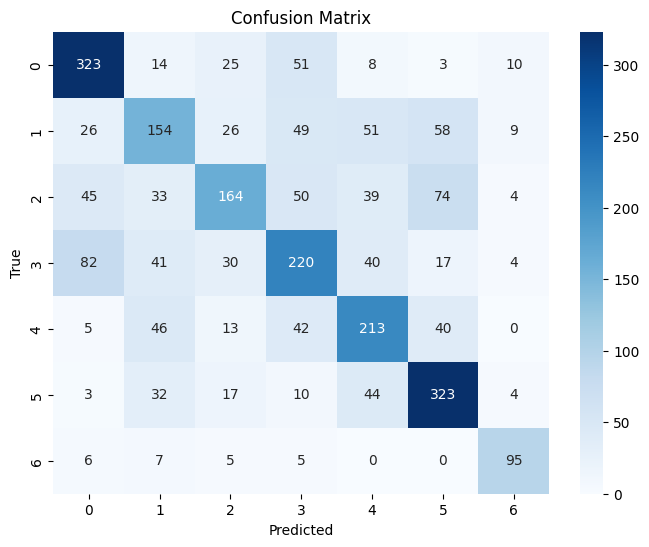

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


<ipython-input-23-c2eb37b11771>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(20), x='Importance', y='Feature', palette='viridis')


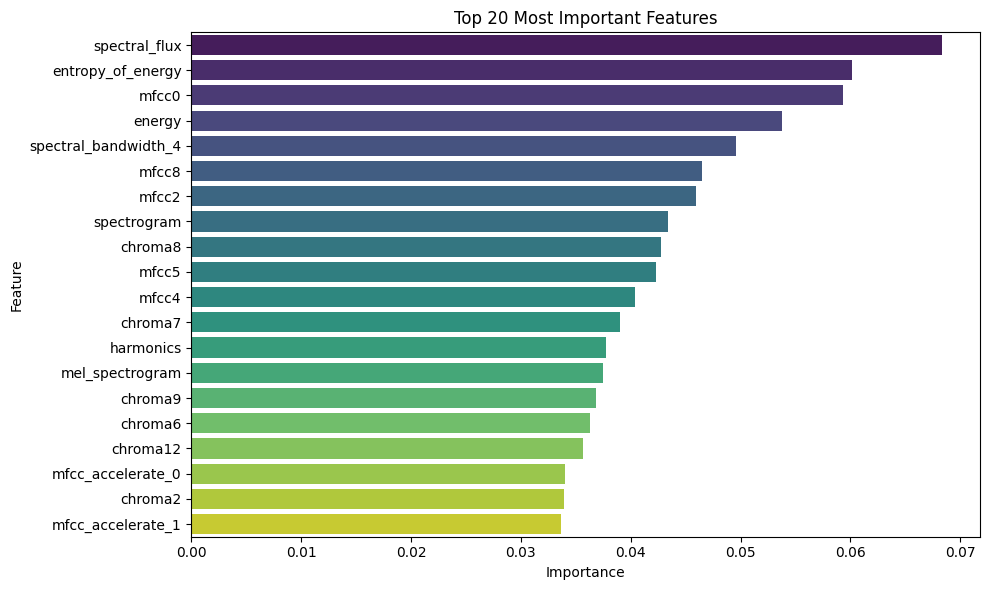

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Assume df_cleaned is your dataset with "emotion" column
X = df_cleaned.drop('Emotion', axis=1)
y = df_cleaned['Emotion']

# Encode emotion labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encoding for output labels
y_categorical = to_categorical(y_encoded)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multiclass
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,975 (406.15 KB)

 Trainable params: 103,975 (406.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2737 - loss: 1.7186 - val_accuracy: 0.4443 - val_loss: 1.4039
Epoch 2/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4215 - loss: 1.4015 - val_accuracy: 0.4883 - val_loss: 1.2885
Epoch 3/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4689 - loss: 1.3068 - val_accuracy: 0.4844 - val_loss: 1.2789
Epoch 4/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5014 - loss: 1.2495 - val_accuracy: 0.5146 - val_loss: 1.2420
Epoch 5/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5190 - loss: 1.2122 - val_accuracy: 0.5166 - val_loss: 1.2018
Epoch 6/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5215 - loss: 1.1687 - val_accuracy: 0.5312 - val_loss: 1.2032
Epoch 7/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5357 - loss: 1.1622 - val_accuracy: 0.5381 - val_loss: 1.1720
Epoch 8/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5485 - loss: 1.1087 - val_accuracy: 0.

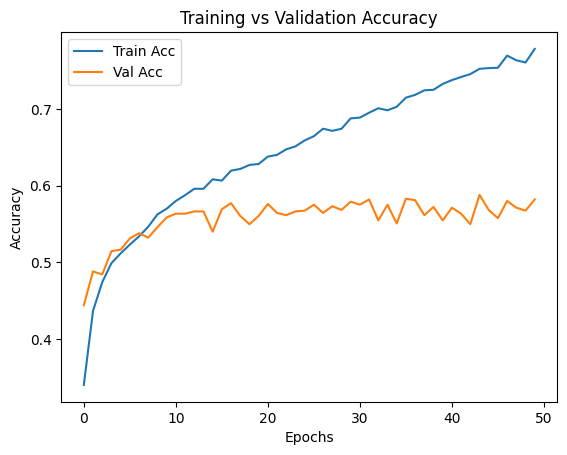

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5811 - loss: 1.3481
Test Accuracy: 0.5660156011581421


In [ ]:
# Accuracy and loss plots
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_acc)


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       434
           1       0.45      0.40      0.42       373
           2       0.54      0.44      0.49       409
           3       0.51      0.49      0.50       434
           4       0.57      0.57      0.57       359
           5       0.59      0.72      0.65       433
           6       0.61      0.80      0.69       118

    accuracy                           0.57      2560
   macro avg       0.56      0.59      0.57      2560
weighted avg       0.56      0.57      0.56      2560



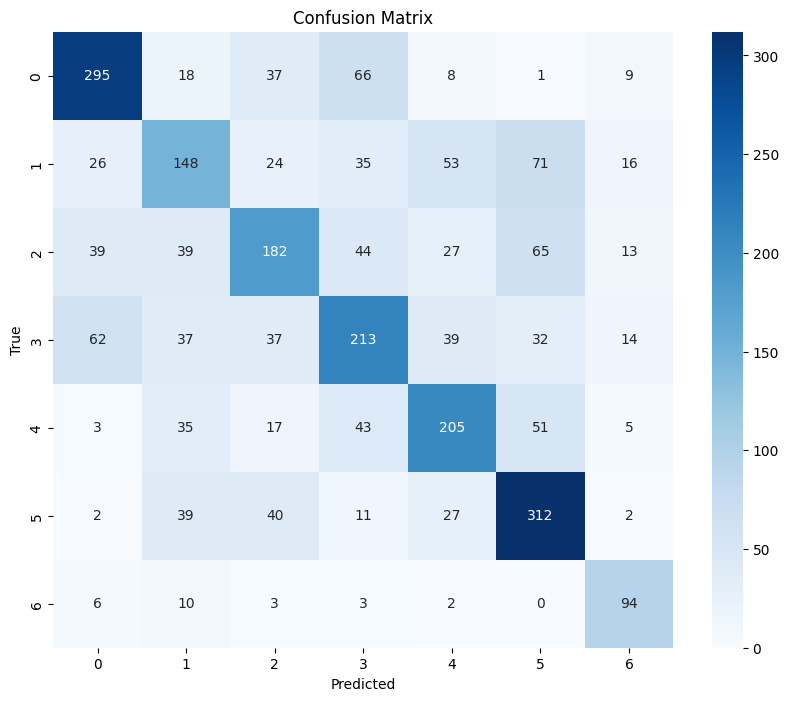

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=64, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))

    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='emotion_ann_tuning'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train_scaled, y_train,
             epochs=30,
             validation_split=0.1,
             verbose=1)

Trial 10 Complete [00h 00m 43s]
val_accuracy: 0.337890625

Best val_accuracy So Far: 0.5771484375
Total elapsed time: 00h 07m 27s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Best model accuracy on test data: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5695 - loss: 1.0720
Best model accuracy on test data: 0.56


In [ ]:
tuner.results_summary()

Results summary
Results in tuner_dir/emotion_ann_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
units_input: 160
dropout_input: 0.30000000000000004
num_layers: 3
units_0: 128
dropout_0: 0.4
learning_rate: 0.001
units_1: 32
dropout_1: 0.4
units_2: 96
dropout_2: 0.1
Score: 0.5771484375

Trial 01 summary
Hyperparameters:
units_input: 256
dropout_input: 0.2
num_layers: 1
units_0: 96
dropout_0: 0.1
learning_rate: 0.0001
Score: 0.5615234375

Trial 02 summary
Hyperparameters:
units_input: 64
dropout_input: 0.2
num_layers: 3
units_0: 128
dropout_0: 0.1
learning_rate: 0.01
units_1: 32
dropout_1: 0.1
units_2: 32
dropout_2: 0.1
Score: 0.5400390625

Trial 00 summary
Hyperparameters:
units_input: 96
dropout_input: 0.2
num_layers: 1
units_0: 32
dropout_0: 0.2
learning_rate: 0.0001
Score: 0.5244140625

Trial 08 summary
Hyperparameters:
units_input: 96
dropout_input: 0.1
num_layers: 4
units_0: 128
dropout_0: 0.30000000000000004
learning